<a href="https://colab.research.google.com/github/FadillahMuhesa/Klasifikasi-Customer-Churn-Dengan-Menggunakan-Metode-SVM/blob/main/TUBES_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Library**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import numpy.random as nr
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC

%matplotlib inline

### **DEFINISIKAN DATA SET**

In [ ]:
data=pd.read_csv('Bank Customer Churn Prediction.csv')
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## **Data Preprocessing**

In [ ]:
df=data.copy()
## customer-id is not useful so i drop it
df=df.drop('customer_id',axis=1)

In [ ]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### **Exploratory Data Analysis (EDA)**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# Definisikan Kolom
df.columns


Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [ ]:
# Definisikan tipe data
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [ ]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='count'>

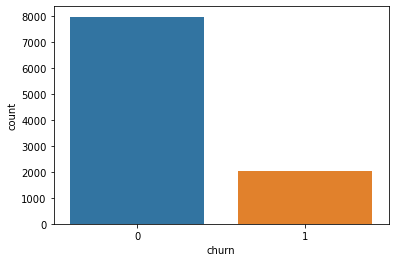

In [ ]:

sns.countplot(df['churn'],label="Count")

In [ ]:
df["churn"].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [ ]:
df["active_member"].value_counts()

1    5151
0    4849
Name: active_member, dtype: int64

In [ ]:
df["credit_card"].value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
credit_score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
products_number,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
credit_card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
active_member,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
estimated_salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
churn,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


array([[<AxesSubplot:title={'center':'credit_score'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'products_number'}>,
        <AxesSubplot:title={'center':'credit_card'}>],
       [<AxesSubplot:title={'center':'active_member'}>,
        <AxesSubplot:title={'center':'estimated_salary'}>,
        <AxesSubplot:title={'center':'churn'}>]], dtype=object)

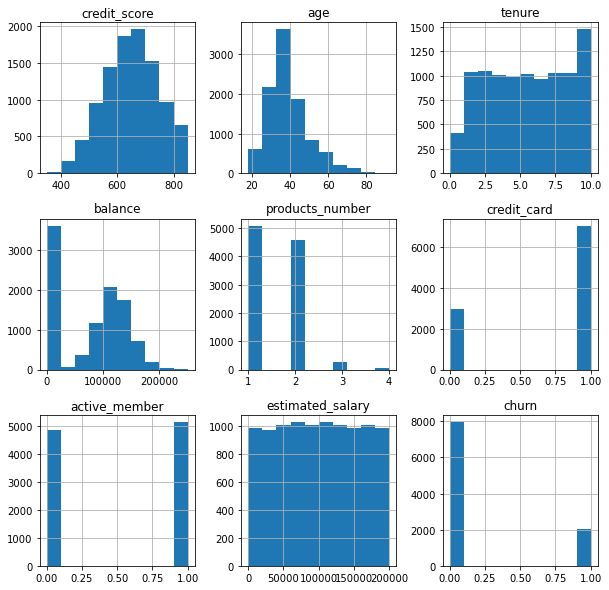

In [ ]:
#buat plot hist untuk masing masing kolom
df.hist(figsize=(10,10))

<AxesSubplot:>

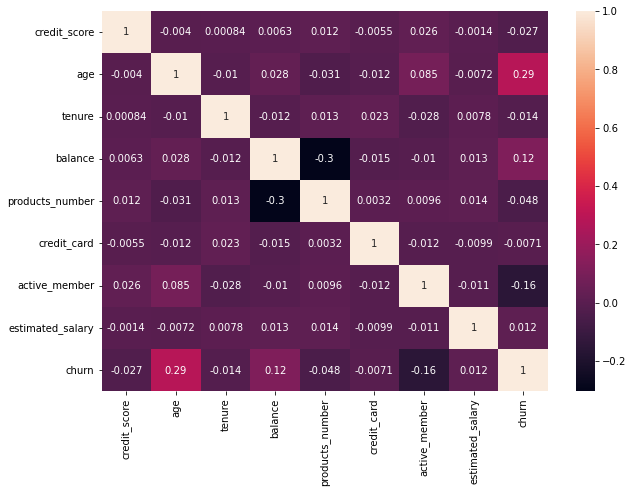

In [ ]:
df.corr()
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True, ax=ax)

### **Data Processing**

In [ ]:
# from sklearn.model_selection import train_test_split
# training_data, testing_data = train_test_split(df, test_size=0.3, random_state=25)

In [ ]:
le=LabelEncoder()
df['country'] = LabelEncoder().fit_transform(df['country'])
df['gender'] = LabelEncoder().fit_transform(df['gender'])

In [ ]:
df['country']. value_counts()

0    5014
1    2509
2    2477
Name: country, dtype: int64

In [ ]:

scaler=MinMaxScaler()
# scaler=PowerTransformer()
# scaler=StandardScaler()
scaler.fit(df.drop('churn',axis=1))
scaled_features=scaler.transform(df.drop('churn',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

df_feat.head()



,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


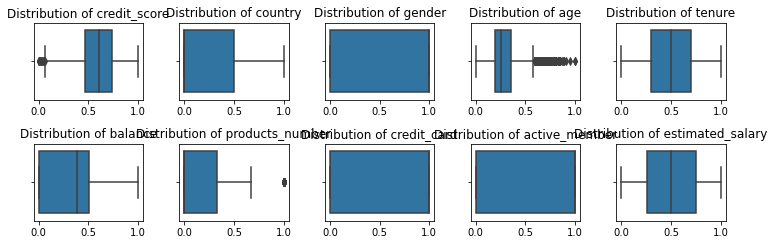

In [ ]:
fig = plt.figure(figsize=(10, 10)) # sets the size of the 4 plot with width as 10 and height as 10
for i,columns in enumerate(df_feat.columns, 1):
    ax = plt.subplot(6,5,i) # creates 3 subplots in one single row
    sns.boxplot(data = df_feat, x=df_feat[columns]) # creates box plots for each feature in df_cont dataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show()

In [ ]:
# def label_transform(x):
#     le = LabelEncoder()
#     Encoded_le = le.fit_transform(x)
#     return Encoded_le

# catagoral_label=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']

# for x in catagoral_label:
#     df[x] = label_transform(df[x])

# def label_transform_minmax(x):
#     le = MinMaxScaler()
#     Encoded_le = le.fit_transform(x)
#     return Encoded_le

# catagoral_label=['Age','Delivery number','Delivery time','Blood of Pressure','Heart Problem']

# for i in catagoral_label:
#     df[i] = label_transform_minmax(df[i])

# df.head()


In [ ]:
# #ambil df kurang kolom churn
# X=df.drop('churn',axis=1)
X = df_feat
y = df['churn']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
#print shape
print(X.shape)
print(y.shape)


(10000, 10)
(10000,)


In [ ]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=123)
X , y = smk.fit_resample(X,y)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='count'>

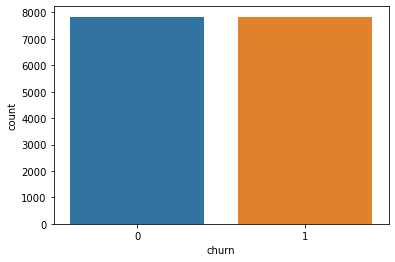

In [ ]:
#plot data y
sns.countplot(y,label="Count")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(replacement=False)
# X_train, y_train = rus.fit_resample(X, y)
# print(X_train.shape)
# print(np.bincount(y_train))


### **Data Modeling**

**SVM**

In [ ]:
svc = SVC(kernel='linear', C=1, probability=True, gamma=1)
model=svc.fit(X_train, y_train)
y_pred_dtc=model.predict(X_test)

Confusion Matrix: 
 [[1441  573]
 [ 526 1379]]
Accuracy:  0.7195713192140852
F1 Score:  0.7150635208711434
Sensitivity:  0.7238845144356956
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      2014
           1       0.71      0.72      0.72      1905

    accuracy                           0.72      3919
   macro avg       0.72      0.72      0.72      3919
weighted avg       0.72      0.72      0.72      3919



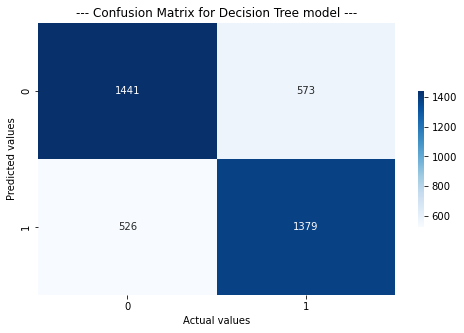

In [ ]:
cm = confusion_matrix(y_test,y_pred_dtc)
print("Confusion Matrix: \n", cm)
simpanaccuracy_linier = accuracy_score(y_test,y_pred_dtc)
print("Accuracy: ", simpanaccuracy_linier)
simpanf1score_linier = f1_score(y_test,y_pred_dtc)
print("F1 Score: ", simpanf1score_linier)
simpan_sensitivity_linier = recall_score(y_test,y_pred_dtc)
print("Sensitivity: ", simpan_sensitivity_linier)
print(classification_report(y_test,y_pred_dtc))


plt.figure(figsize=(8,5))
axis_labels = ['0', '1']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')



In [ ]:
svc2 = SVC(kernel='rbf', C=5, probability=True)
model2=svc2.fit(X_train, y_train)
y_pred_dtc2=model2.predict(X_test)

Confusion Matrix: 
 [[1602  412]
 [ 353 1552]]
Accuracy:  0.804797142128094
F1 Score:  0.802274489532179
Sensitivity:  0.8146981627296588
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2014
           1       0.79      0.81      0.80      1905

    accuracy                           0.80      3919
   macro avg       0.80      0.81      0.80      3919
weighted avg       0.81      0.80      0.80      3919



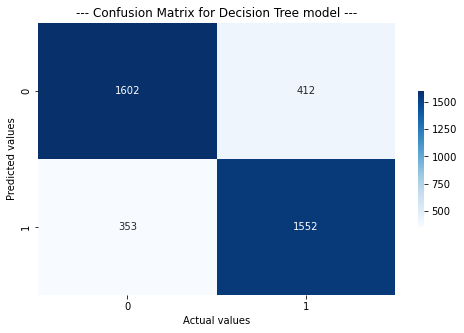

In [ ]:

cm = confusion_matrix(y_test,y_pred_dtc2)
print("Confusion Matrix: \n", cm)
simpanaccuracy_rbf = accuracy_score(y_test,y_pred_dtc2)
print("Accuracy: ", simpanaccuracy_rbf)
simpanf1score_rbf = f1_score(y_test,y_pred_dtc2)
print("F1 Score: ", simpanf1score_rbf)
simpan_sensitivity_rbf = recall_score(y_test,y_pred_dtc2)
print("Sensitivity: ", simpan_sensitivity_rbf)
print(classification_report(y_test,y_pred_dtc2))


plt.figure(figsize=(8,5))
axis_labels = ['0', '1']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')






Confusion Matrix: 
 [[1819  195]
 [ 167 1738]]
Accuracy:  0.907629497320745
F1 Score:  0.9056800416883795
Sensitivity:  0.9123359580052494
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2014
           1       0.90      0.91      0.91      1905

    accuracy                           0.91      3919
   macro avg       0.91      0.91      0.91      3919
weighted avg       0.91      0.91      0.91      3919



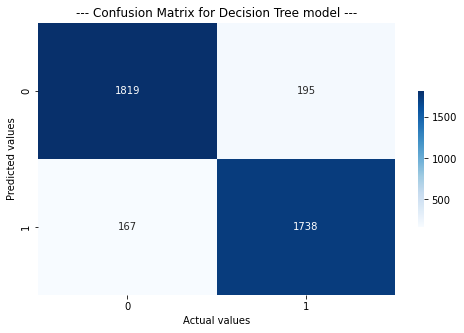

In [ ]:
#Gunakan random forest untuk memprediksi churn
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
model4=rfc.fit(X_train, y_train)
y_pred_dtc4=model4.predict(X_test)

cm = confusion_matrix(y_test,y_pred_dtc4)
print("Confusion Matrix: \n", cm)
simpanaccuracy_rfc = accuracy_score(y_test,y_pred_dtc4)
print("Accuracy: ", simpanaccuracy_rfc)
simpanf1score_rfc = f1_score(y_test,y_pred_dtc4)
print("F1 Score: ", simpanf1score_rfc)
simpan_sensitivity_rfc = recall_score(y_test,y_pred_dtc4)
print("Sensitivity: ", simpan_sensitivity_rfc)
print(classification_report(y_test,y_pred_dtc4))


plt.figure(figsize=(8,5))
axis_labels = ['0', '1']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')



<AxesSubplot:title={'center':'--- Model Comparison ---'}, xlabel='Model'>

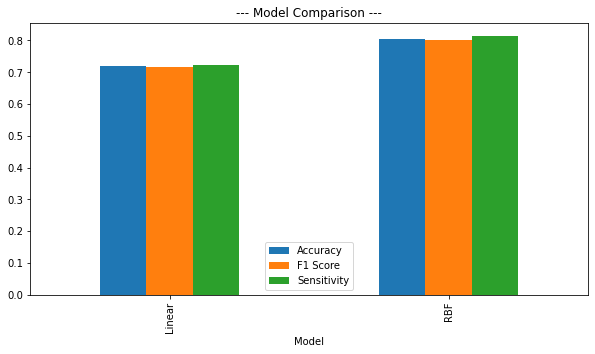

In [ ]:
#buat plot kekanan hasil accuracy, f1 score, sensitivity untuk masing masing model
plot_data = [['Linear', simpanaccuracy_linier, simpanf1score_linier, simpan_sensitivity_linier], ['RBF', simpanaccuracy_rbf, simpanf1score_rbf, simpan_sensitivity_rbf]]

plot_df = pd.DataFrame(plot_data, columns=['Model', 'Accuracy', 'F1 Score', 'Sensitivity'])

plot_df.plot(x='Model', y=['Accuracy', 'F1 Score', 'Sensitivity'], kind='bar', figsize=(10, 5), title='--- Model Comparison ---')

#['RFC', simpanaccuracy_rfc, simpanf1score_rfc, simpan_sensitivity_rfc]]

<AxesSubplot:title={'center':'--- Model Comparison ---'}, xlabel='Model'>

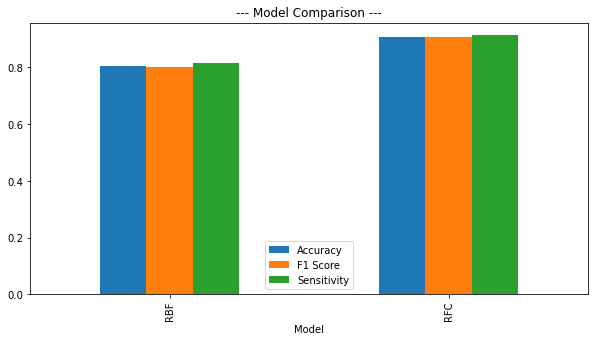

In [ ]:
#buat plot kekanan hasil accuracy, f1 score, sensitivity untuk masing masing model
plot_data = [['RBF', simpanaccuracy_rbf, simpanf1score_rbf, simpan_sensitivity_rbf], ['RFC', simpanaccuracy_rfc, simpanf1score_rfc, simpan_sensitivity_rfc]]

plot_df = pd.DataFrame(plot_data, columns=['Model', 'Accuracy', 'F1 Score', 'Sensitivity'])

plot_df.plot(x='Model', y=['Accuracy', 'F1 Score', 'Sensitivity'], kind='bar', figsize=(10, 5), title='--- Model Comparison ---')

#

## **COBA Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [10, 100, 1000],
              'gamma': [1, 0.01, 0.001],
              'kernel': ['rbf']}

grid = GridSearchCV(model2, param_grid, refit = True, verbose = 3)

# fitting the model for grid search
model3=grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.815 total time=  18.9s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.818 total time=  19.9s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.808 total time=  16.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.797 total time=  14.2s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.818 total time=  15.1s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.695 total time=  17.8s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.713 total time=  18.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.712 total time=  17.3s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.711 total time=  17.7s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.727 total time=  17.5s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.667 total time=  20.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;,

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)


{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, gamma=1, probability=True)
0.8572522330923011


In [ ]:
model3=grid.best_estimator_
y_pred_dtc3=model3.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred_dtc3))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      2014
           1       0.81      0.92      0.87      1905

    accuracy                           0.86      3919
   macro avg       0.87      0.86      0.86      3919
weighted avg       0.87      0.86      0.86      3919



In [ ]:
# cross validation model 3
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model3, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))


Cross-validation scores: [0.85452999 0.86558911 0.85452999 0.85410464 0.85750744]
